In [1]:
from glob import glob
from gzip import open # NB: overrides standard open()
import os
import math
import functools
import numpy as np
import scipy.interpolate
from scipy import interpolate
import pandas as pd
import pickle as pkl

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

##### Возможно ранее я где-то совершил ошибку при интерполировании сигналов рассеяния, поэтому, пройду весь путь сначала

In [174]:
fds = sorted(os.listdir('C:/Users/admin/Desktop/курсовая 2.0/X — копия/')) 
#формируем список файлов x для считывания в цикле
xw = pd.read_csv('C:/Users/admin/Desktop/курсовая 2.0/X — копия/01.txt',sep='\t')
colums=list(xw.columns.values) #установил имена колонок
rows=list(xw.index.values)  #установил имена строчек

In [175]:
X=np.zeros([35,206,55]) #инициализирую массив нулей

In [176]:
# X = the predictors, a tensor
# dimensions: (sample, emission wavelength, excitation wavelength)

# first read the text files individually
# make sure to sort the list of files, they must correspond to rows in y
X_ = [pd.read_csv(f, sep='\t') for f in sorted(glob('C:/Users/admin/Desktop/курсовая 2.0/X — копия/??.txt'))]
# sanity check: wavelengths must be the same in all files
for x in X_[1:]:
	# errors will also happen if any of the files have different dimensions
	if not ((x.axes[0] == X_[0].axes[0]).all() and (x.axes[1] == X_[0].axes[1]).all()):
		# it doesn't quite matter what we raise here
		# the important thing is to complain loudly and crash
		raise Exception(x.axes)

In [177]:
# Считаем наши данные в наш тензор
for i in range(0,35):
    x = pd.read_csv('C:/Users/admin/Desktop/курсовая 2.0/X — копия/'+fds[i],sep='\t')
    x = x.fillna(0)
    x = x.replace(',','.', regex=True) #меняю ',' на '.'
    x = x.astype(float) #конвертирую из string в float
    X[i,:,:]=np.array(x)

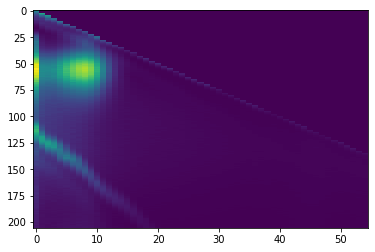

In [178]:
plt.imshow(X[34,:,:],aspect='auto')
plt.show()

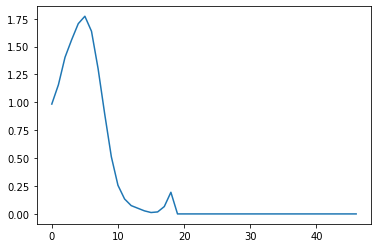

In [179]:
plt.plot(X[34,53,3:50])
plt.show();

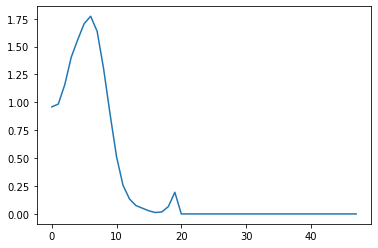

In [180]:
plt.plot(X[34,53,2:50])
plt.show();

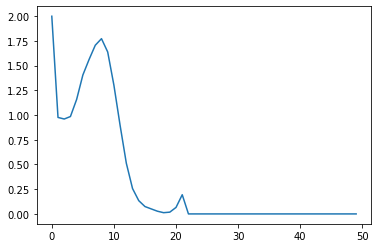

In [181]:
plt.plot(X[34,53,0:50])
plt.show();

#### Как видно из графиков чуть выше, к нашему спектру вначале дабавился ещё и эмиссионный спектр. В прошлый раз я пытался его интерполировать, что бы не терять данные, сейчас просто отрежу первые пару длин волн.

In [182]:
koef=3 #количество столбцов, которые будут отрезаны
X=X[:,:,koef:]

In [183]:
ll=xw.columns.values[koef:] #колонки
lrl=xw.index.values #строчки
lrl=lrl.astype(float)
ll=ll.astype(float)
Xw=np.zeros([len(lrl),len(ll)]) #инициализирую массив нулей
cons=3400
def lo(t):
    return  1/((1/t) - (cons/1e7))
for i in range(0,len(lrl)):
    for j in range(0,len(ll)):
        if (
                (math.fabs((2*ll[j])-(lrl[i]))<15) or 
                (math.fabs(ll[j]-(lrl[i]))<15) or
                (math.fabs((2*lrl[i])-(lo(ll[j])))<15) or 
                (math.fabs(lrl[i]-lo(ll[j]))<15)):
            Xw[i,j]=1.0  #собираю булеву матрицу
Xw=Xw[:,koef:]

##### Как видно из графиков, идея с поиском с использованием аналитического вида прямых рассеяния провалилась, поэтому, перехожу к простому подбору. Разделю каждый входящий вектор на крупные пики (не шум), и Придумаю какой-нибудь простенький классификатор, чтобы их соотнести

In [ ]:
def function_2(data):
    vector=np.zeros([data])
    exstremums=dict()
    for i in range(1,len(data)-1):
        if (data[i]==0):
            continue
        if (data[i-1]==0)and (data[i]!=0):
            exstremums[i]=data[i]
        if (data[i+1]data[i-1])<0:
            deep=1
            

In [201]:
import pywt

In [208]:
w = pywt.Wavelet('db2')

In [210]:
coefs, frequencies =pywt.dwt(X[3,:,0], wavelet=w, mode='smooth')

In [214]:
frequencies

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.27547822e-01, -3.84912939e-02, -2.07095644e-02, -7.35281623e-03,
        6.79431969e-03,  1.17791536e-02, -1.95267127e-03, -1.73991237e-02,
       -3.71795556e-03, -3.41244365e-03,  1.33409660e-02,  5.34611977e-03,
        1.74558188e-02,  1.60965022e-02, -1.11017303e-02, -8.81434434e-04,
       -6.23226637e-03,  1.26069847e-02, -2.25272442e-02,  1.52018152e-02,
       -4.43496672e-03,  1.64057255e-02,  2.40570014e-02,  1.53525778e-02,
        4.54532638e-03,  7.31748726e-03,  2.91358961e-03,  3.33004382e-03,
        3.58859871e-03, -5.94451184e-03,  2.66065237e-03, -7.49573808e-03,
        1.66262147e-02, -1.21121435e-02, -1.23247094e-03, -4.61797625e-04,
        1.40411642e-02,  2.84929438e-03,  1.58274466e-02,  1.21931122e-03,
        1.31638837e-03, -9.73506229e-03, -9.46867732e-03,  1.31986670e-03,
       -4.06283447e-03, -2.17589276e-03, -9.72015809e-04,  5.76157618e-03,
        5.82960240e-03,  

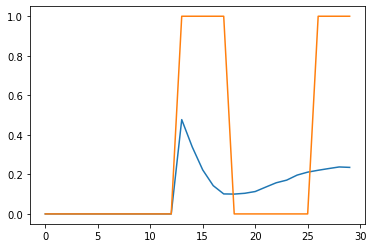

In [200]:
plt.plot(X[3,20:50,10])
plt.plot(Xw[20:50,10])
plt.show();

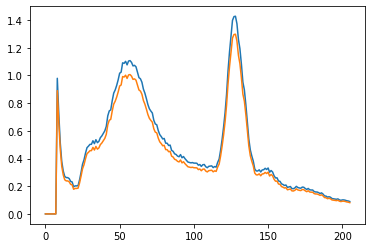

In [217]:
plt.plot(1.1*X[3,:,0])
plt.plot(pywt.idwt(coefs, frequencies, 'db2', 'smooth'))
plt.show();

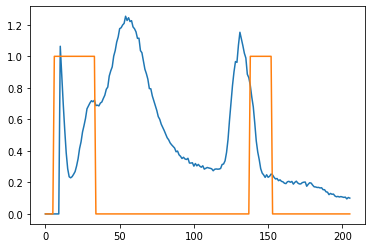

In [186]:
plt.plot(X[3,:,1])
plt.plot(Xw[:,1])
plt.show();

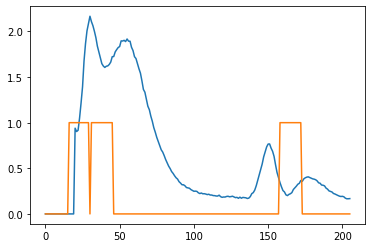

In [187]:
plt.plot(X[3,:,5])
plt.plot(Xw[:,5])
plt.show();

#### Как видно из графиков, иногда интерполяционный коридор слишком широкий, а иногда, наоборот, слишком узкий, поэтому, напишу функцию, которая подгоняет эту ширину

In [188]:
def function_1 (data, bool_vector, relation):
    bottom_koef=1.01
    # Я заметил, что на некоторых образцах коридор 1 оказывается настолько широким, что помимо сигнала рассеяния
    # полностью захватывает наш сигнал, поэтому нужно ещё раз пройтись (Смотреть образец №3)
    for i in range(1,len(bool_vector)-1):
        if (bool_vector[i-1]==1) and (bool_vector[i]==1) and (bool_vector[i+1]==1):
            if (bool_vector[i-1]>bottom_koef*bool_vector[i]) and (bool_vector[i+1]>bottom_koef*bool_vector[i]):
                while (bool_vector[i+1]!=0):
                    bool_vector[i]=0
                    i+=1
    for i in range(0,len(bool_vector)-1):
        if data[i]==0:
            bool_vector[i]=0
            continue
        if (bool_vector[i]==1) and (bool_vector[i+1]==0):
            while data[i]<=data[i+1]:
                bool_vector[i]=0
                i-=1
            if ((data[i]/data[i+1])>=relation):
                bool_vector[i+1]=1
        if (bool_vector[i]==0) and (bool_vector[i+1]==1):
            while data[i]>=data[i+1]:
                bool_vector[i+1]=0
                if (i==len(bool_vector)-2):
                    break
                i+=1
    return bool_vector

In [189]:
def function_2 (data, bool_matrix, relation):
    for i in range(0,data.shape[1]):
        for j in range(0,da)
        bool_matrix[:,i]=function_1(data[34,:,i],Xw[:,i],1.01)

SyntaxError: invalid syntax (<ipython-input-189-094ad36b56ea>, line 3)

In [190]:
for i in range(0,32):
    Xw[:,i]=function_1(X[3,:,i],Xw[:,i],1.01)

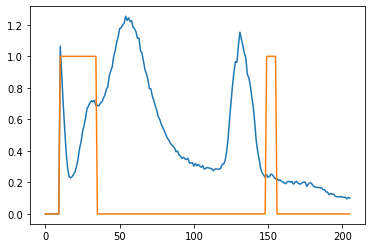

In [191]:
plt.plot(X[3,:,1])
plt.plot(Xw[:,1])
plt.show();

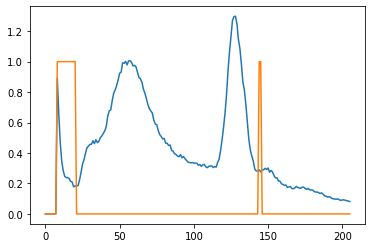

In [192]:
plt.plot(X[3,:,0])
plt.plot(Xw[:,0])
plt.show();

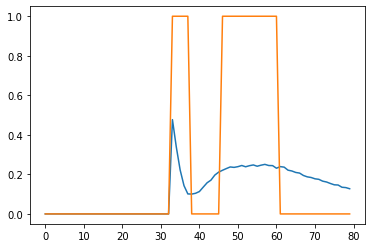

In [193]:
plt.plot(X[3,0:80,10])
plt.plot(Xw[0:80,10])
plt.show();

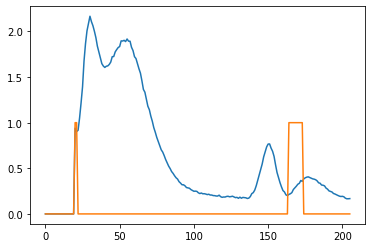

In [194]:
plt.plot(X[3,:,5])
plt.plot(Xw[:,5])
plt.show();

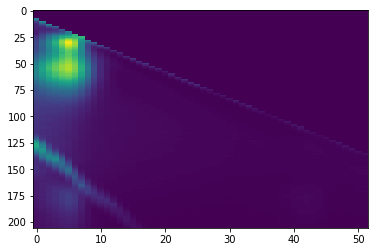

In [196]:
plt.imshow(X[3,:,:],aspect='auto')
plt.show()